# Аналіз текстів
# Виконав студент ІП-21 Пізнак Роман

## Основне завдання

## Нормалізація та попередня обробка даних:
    - Провести очищення текстових даних від стоп-слів/тегів/розмітки.
    - Виконати токенізацію текстових елементів
    - Провести лематизацію текстових елементів. Зберегти результат в окремий файл.
    - Створити Bag of Words для всіх нормалізованих слів. Зберегти результат в окремий файл.
    - Порахувати метрику TF-IDF для 10 слів, що найчастіше зустрічаються в корпусі;

## Імпортуємо необхідні бібліотеки та завантажимо робочі дані у датайрейм

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ukr_text.csv')
df.head()

Id  \
0  http://k.img.com.ua/rss/ua/4013798   
1  http://k.img.com.ua/rss/ua/4001679   
2  http://k.img.com.ua/rss/ua/4001390   
3  http://k.img.com.ua/rss/ua/4001239   
4  http://k.img.com.ua/rss/ua/4001227   

                                               Title  \
0      Кличко покликав німецьких інвесторів до Києва   
1  З'явилося відео, як байкер почав стріляти у во...   
2        У центрі Києва посеред вулиці помер чоловік   
3       Нічний ураган перетворив Хрещатик на смітник   
4      Потоп у Києві: столицю накрив ураган з градом   

                                                Body  
0  Київ - перспективний і відкритий ринок для біз...  
1     З'явилося відео конфлікту між мотоциклістом...  
2  У Києві на Бессарабській площі вранці в четвер...  
3  Київ вночі 16 серпня пережив найсильнішу грозу...  
4  Уночі Київ вкотре накрила негода. Найсильніший...

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      1122 non-null   object
 1   Title   1122 non-null   object
 2   Body    1122 non-null   object
dtypes: object(3)
memory usage: 26.4+ KB


## Видалимо стовпець Id

In [4]:
df.drop(['Id'], axis=1, inplace=True)
df.head()

Title  \
0      Кличко покликав німецьких інвесторів до Києва   
1  З'явилося відео, як байкер почав стріляти у во...   
2        У центрі Києва посеред вулиці помер чоловік   
3       Нічний ураган перетворив Хрещатик на смітник   
4      Потоп у Києві: столицю накрив ураган з градом   

                                                Body  
0  Київ - перспективний і відкритий ринок для біз...  
1     З'явилося відео конфлікту між мотоциклістом...  
2  У Києві на Бессарабській площі вранці в четвер...  
3  Київ вночі 16 серпня пережив найсильнішу грозу...  
4  Уночі Київ вкотре накрила негода. Найсильніший...

## У цілях експерименту, перед очисткою текстових даних сформуємо 'Хмари слів'. У подальшому порівняємо їх з хмарами очищених даних.

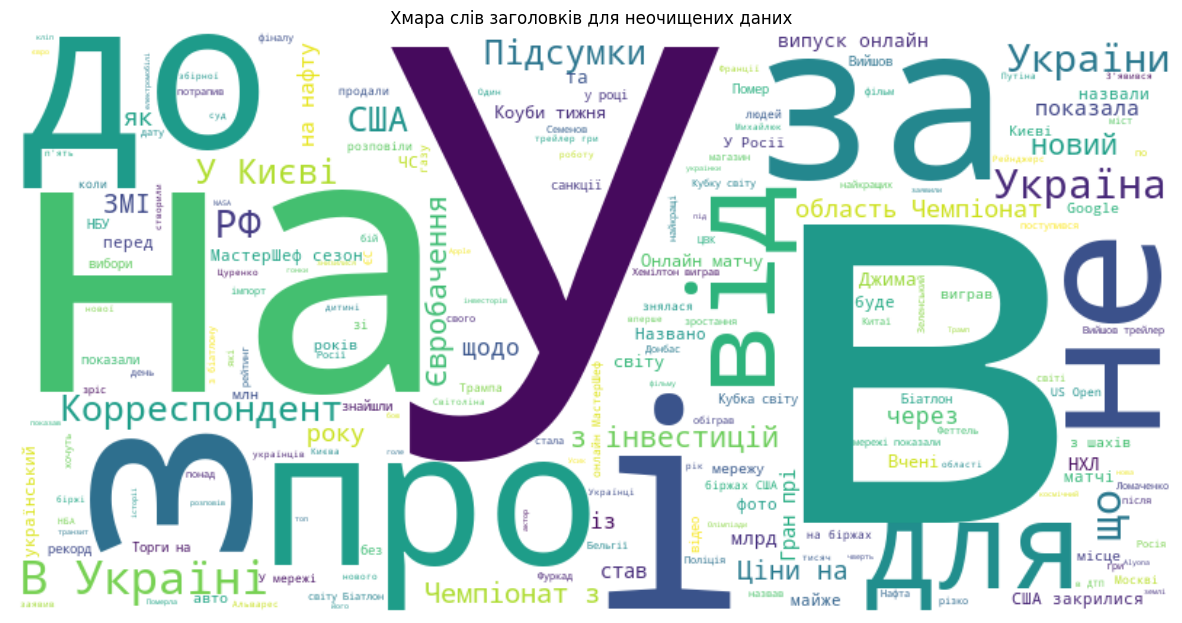

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(data, title):
    text = ' '.join(data)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

generate_wordcloud(df['Title'], 'Хмара слів заголовків для неочищених даних')

Аналогічно зробимо хмару слів для текстів самих статтей

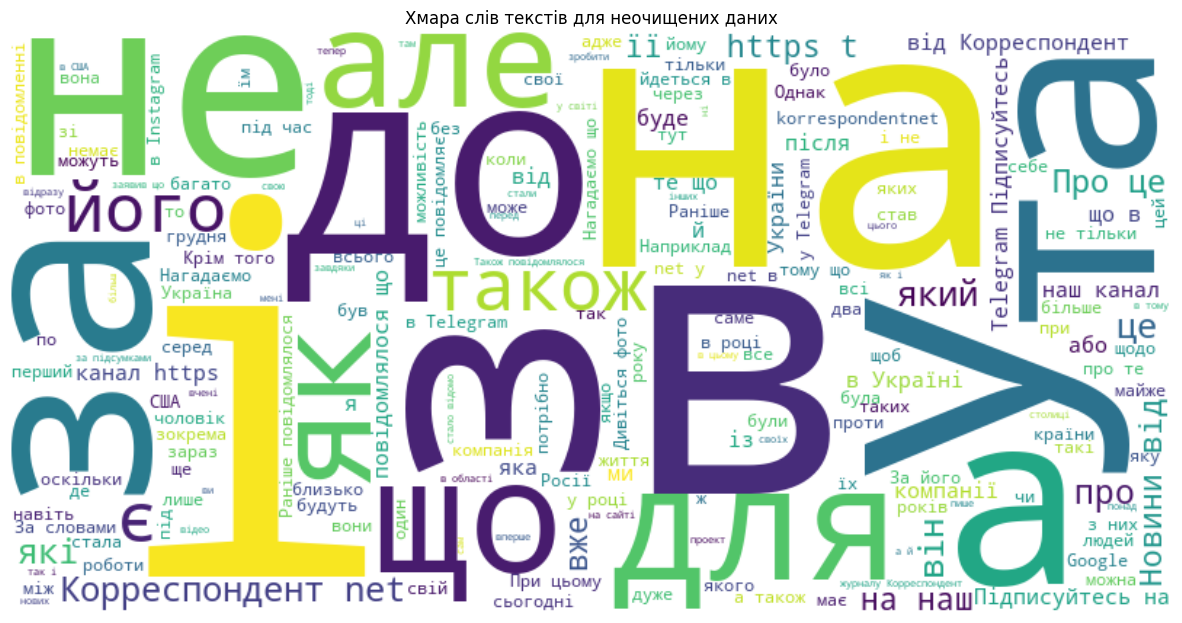

In [6]:
generate_wordcloud(df['Body'], 'Хмара слів текстів для неочищених даних')

## Очистимо заголовки та тексти від тегів та розмітки

Для цього імпортуємо модуль BeautifulSoup. З його допомогою ми зможемо видалити всі HTML-теги і отримати лише сам текст

In [7]:
from bs4 import BeautifulSoup

def clean_html(text):
    soup = BeautifulSoup(text, 'html.parser')
    cleaned_text = soup.get_text(separator=' ')
    return cleaned_text

In [8]:
df['Title'] = df['Title'].apply(clean_html)
df['Body'] = df['Body'].apply(clean_html)

C:\Users\Користувач\AppData\Local\Temp\ipykernel_14220\3944697628.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


## Визначимо стоп-слова (сполучники, прийменники, артиклі, тощо)

Користуючись інтернет-джерелами, створимо список стоп-слів. (<b>Важливо:</b> слова можуть повторюватись)

<b>Джерела:</b>
    <li>https://raw.githubusercontent.com/olegdubetcky/Ukrainian-Stopwords/main/ukrainian</li>
   <li>https://gist.githubusercontent.com/kissarat/bec2bb727c9fb520043a/raw/ba3116872c6261ceaa0a9f4db616c742f7d3cba0/ukrainian-stopwords.txt</li>

In [9]:
stopwords = pd.read_csv('stopwords_ua.csv', encoding='cp1251')
stopwords.head()

stopword
0        в
1        у
2       не
3       що
4      він

In [10]:
stopwords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   stopword  869 non-null    object
dtypes: object(1)
memory usage: 6.9+ KB


Видалимо дублікати

In [11]:
stopwords['stopword'] = stopwords['stopword'].drop_duplicates()
stopwords = stopwords.dropna(subset=['stopword'])
stopwords.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426 entries, 0 to 868
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   stopword  426 non-null    object
dtypes: object(1)
memory usage: 6.7+ KB


Знайшов слово з граматичною помилкою)

In [12]:
stopwords['stopword'] = stopwords['stopword'].str.replace('будь-ласка', 'будь ласка')

## Завантажу набір стоп-слів для подальшого використання

In [13]:
stopwords.to_csv('cleaned_stopwords.csv', index=False, encoding='cp1251')

## Видалю стоп-слова

In [14]:
import re

def remove_stopwords(text, stopwords):
    text = re.sub(r'\b(?:{})\b'.format('|'.join(stopwords)), '', text.lower())
    return text

In [15]:
df['Title'] = df['Title'].apply(remove_stopwords, stopwords=stopwords['stopword'])
df['Body'] = df['Body'].apply(remove_stopwords, stopwords=stopwords['stopword'])

## Видалю числа з тексту

In [16]:
def remove_numbers(text):
    text_without_numbers = re.sub(r'\d+', '', text)
    return text_without_numbers

In [17]:
df['Title'] = df['Title'].apply(remove_numbers)
df['Body'] = df['Body'].apply(remove_numbers)

## Повторно створю 'Хмари слів'

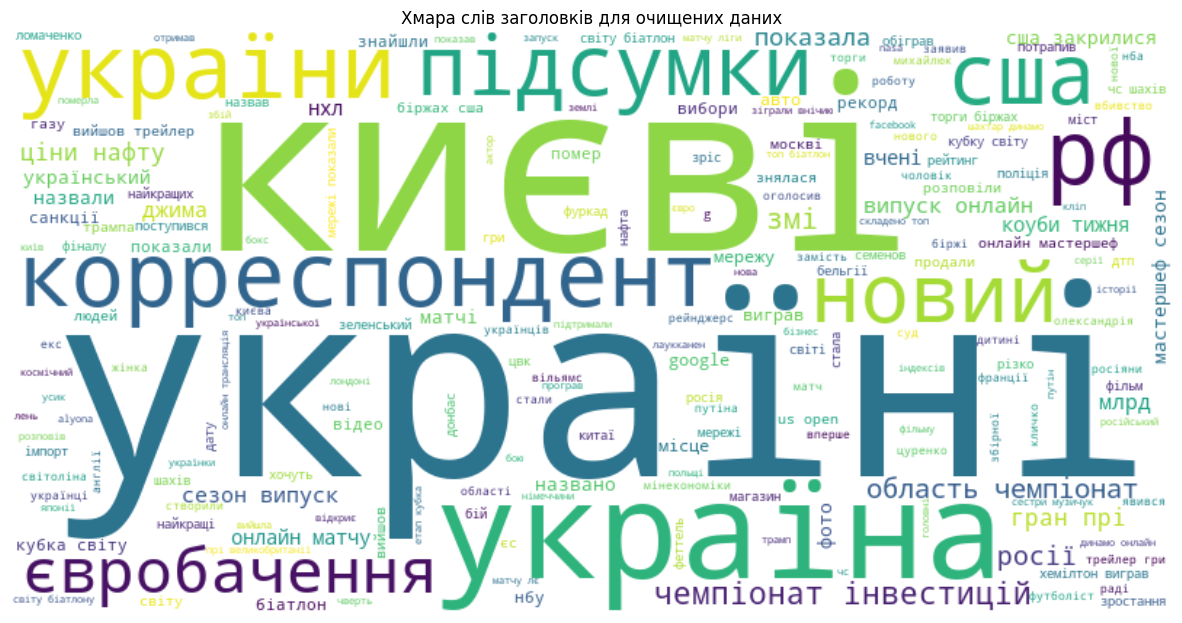

In [18]:
generate_wordcloud(df['Title'], 'Хмара слів заголовків для очищених даних')

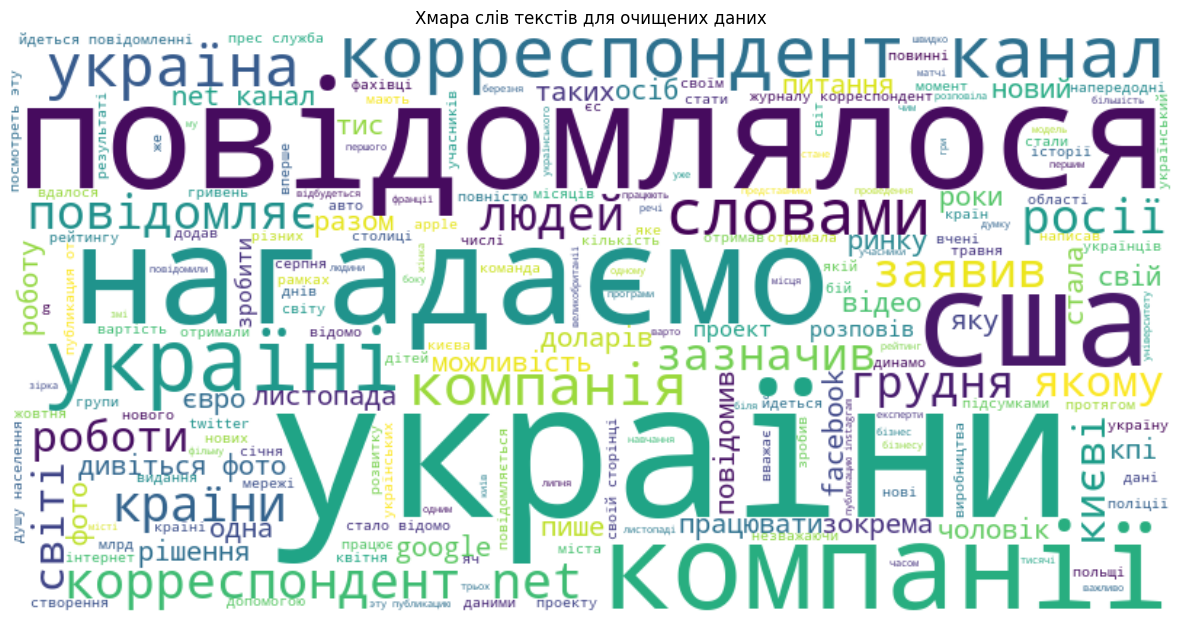

In [19]:
generate_wordcloud(df['Body'], 'Хмара слів текстів для очищених даних')

Як бачимо, хмари слів значно змінилися після очистки

## Проведемо токенізацію та лематизацію текстових даних

In [20]:
import spacy
from string import punctuation

nlp = spacy.load("uk_core_news_sm")

def tokenize_and_lemmatize(text):
    lemmatized_words = [token.lemma_.lower() for token in nlp(text.translate(str.maketrans('', '', punctuation + '«»—–’')))]
    return [word for word in lemmatized_words if word not in nlp.Defaults.stop_words and re.match(r"\w", word)]

In [21]:
df['Title_tokens'] = df['Title'].apply(tokenize_and_lemmatize)
df['Body_tokens'] = df['Body'].apply(tokenize_and_lemmatize)

In [22]:
df.head()

Title  \
0        кличко покликав німецьких інвесторів  києва   
1  'явилося відео,  байкер почав стріляти  водія ...   
2                 центрі києва  вулиці помер чоловік   
3         нічний ураган перетворив хрещатик  смітник   
4        потоп  києві: столицю накрив ураган  градом   

                                                Body  \
0  київ - перспективний  відкритий ринок  бізнесу...   
1     'явилося відео конфлікту  мотоциклістом  во...   
2   києві  бессарабській площі вранці  четвер,  с...   
3  київ вночі  серпня пережив найсильнішу грозу  ...   
4  уночі київ вкотре накрила негода. найсильніший...   

                                        Title_tokens  \
0     [кличко, покликати, німецький, інвестор, київ]   
1  [явилося, відео, байкер, почати, стріляти, вод...   
2            [центр, київ, вулиця, померти, чоловік]   
3   [нічний, ураган, перетворити, хрещатик, смітник]   
4     [потоп, києві, столиця, накрити, ураган, град]   

                                         Body_tokens  
0  [київ, перспективний, відкритий, ринок, бізнес...  
1  [явилося, відео, конфлікт, мотоцикліст, водій,...  
2  [кий, бессарабський, площа, вранці, четвер, се...  
3  [київ, вночі, серпень, пережити, найсильніший,...  
4  [уночі, київ, вкотре, накрити, негода, найсиль...

Збережемо результати у окремий файл

In [23]:
df[['Title_tokens', 'Body_tokens']].to_csv('lemmatized_data.csv', index=False, encoding='cp1251', errors='replace')

In [24]:
def generate_token_wordcloud(data, title):
    text = ' '.join([' '.join(tokens) for tokens in data])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

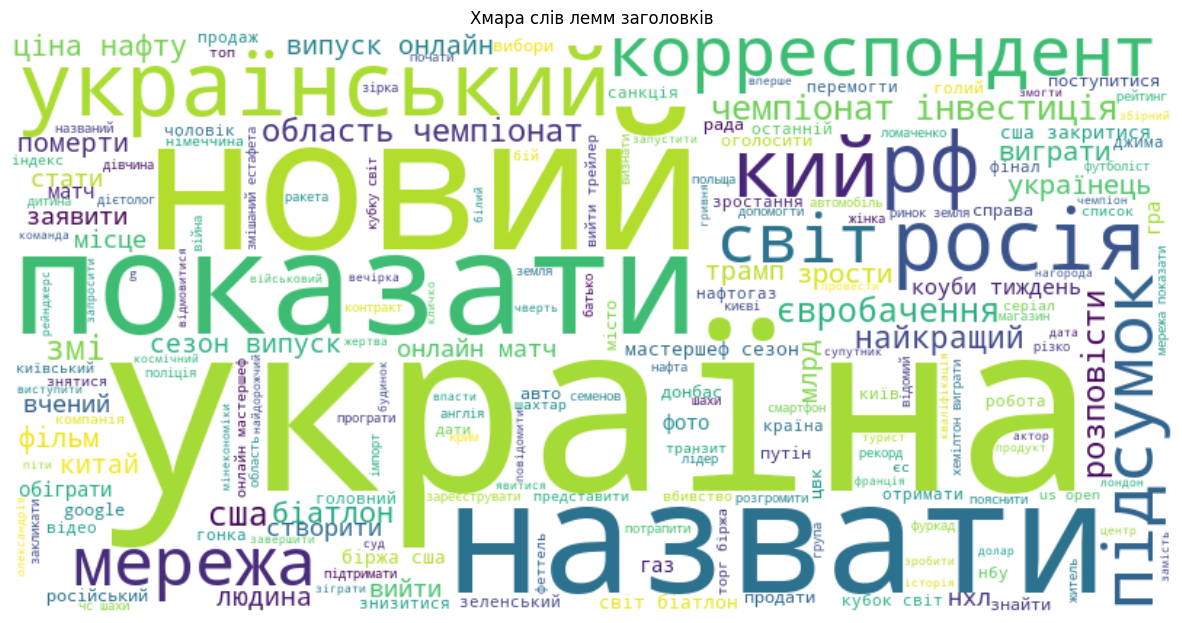

In [25]:
generate_token_wordcloud(df['Title_tokens'], 'Хмара слів лемм заголовків')

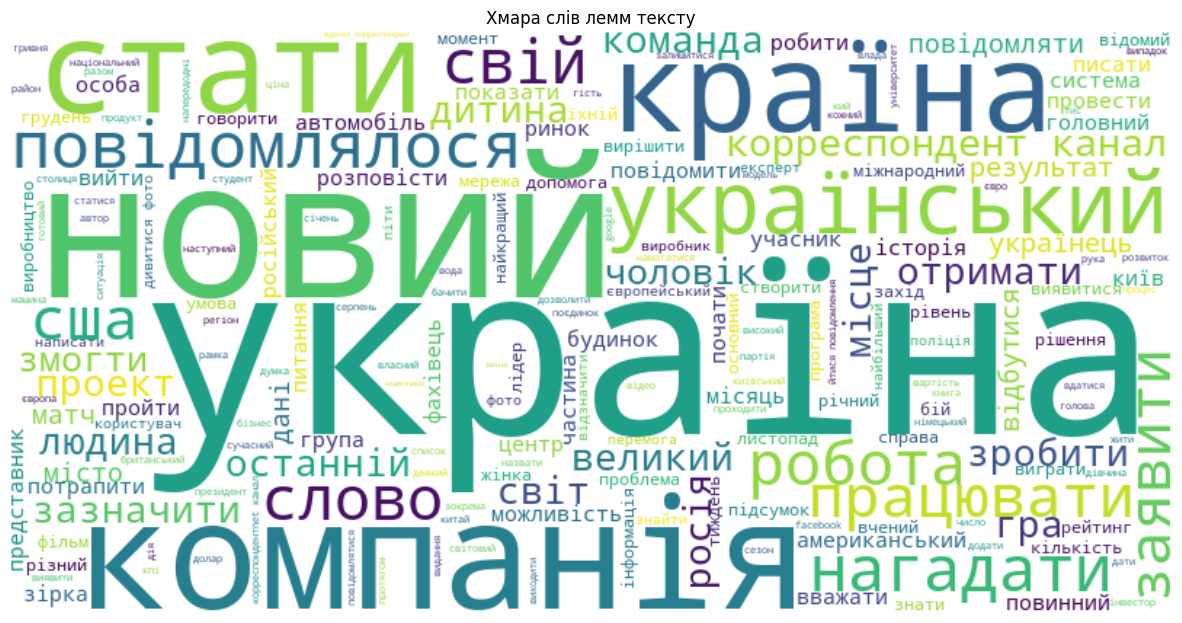

In [26]:
generate_token_wordcloud(df['Body_tokens'], 'Хмара слів лемм тексту')

## Створимо Bag of Words та завантажимо результат

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

corpus = [' '.join(tokens) for tokens in df['Title_tokens']] + [' '.join(tokens) for tokens in df['Body_tokens']]
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(corpus)
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())
bow_df.to_csv('bag_of_words.csv', index=False, errors='replace', encoding='cp1251')

## Переглянемо загальний вигляд bag of words:

In [28]:
bow_df

abbotswood  abc  abdulaziz  abfoundation  able  aboard  about  abroad  \
0              0    0          0             0     0       0      0       0   
1              0    0          0             0     0       0      0       0   
2              0    0          0             0     0       0      0       0   
3              0    0          0             0     0       0      0       0   
4              0    0          0             0     0       0      0       0   
...          ...  ...        ...           ...   ...     ...    ...     ...   
2239           0    0          0             0     0       0      0       0   
2240           0    0          0             0     0       0      0       0   
2241           0    0          0             0     0       0      0       0   
2242           0    0          0             0     0       0      0       0   
2243           0    0          0             0     0       0      0       0   

      ac  accord  ...  ґрунт  ґрунтовий  ґрунтовний  ґрунтовно  ґрунтуватись  \
0      0       0  ...      0          0           0          0             0   
1      0       0  ...      0          0           0          0             0   
2      0       0  ...      0          0           0          0             0   
3      0       0  ...      0          0           0          0             0   
4      0       0  ...      0          0           0          0             0   
...   ..     ...  ...    ...        ...         ...        ...           ...   
2239   0       0  ...      0          0           0          0             0   
2240   0       0  ...      0          0           0          0             0   
2241   0       0  ...      0          0           0          0             0   
2242   0       0  ...      0          0           0          0             0   
2243   0       0  ...      0          0           0          0             0   

      ґрунтуватися  ґудзик  ґула  ґю  ґюї  
0                0       0     0   0    0  
1                0       0     0   0    0  
2                0       0     0   0    0  
3                0       0     0   0    0  
4                0       0     0   0    0  
...            ...     ...   ...  ..  ...  
2239             0       0     0   0    0  
2240             0       0     0   0    0  
2241             0       0     0   0    0  
2242             0       0     0   0    0  
2243             0       0     0   0    0  

[2244 rows x 26241 columns]

Переконаємося, що рядки ненульові

In [29]:
bow_df[bow_df['ґрунт'] > 0]

abbotswood  abc  abdulaziz  abfoundation  able  aboard  about  abroad  \
1932           0    0          0             0     0       0      0       0   
1983           0    0          0             0     0       0      0       0   

      ac  accord  ...  ґрунт  ґрунтовий  ґрунтовний  ґрунтовно  ґрунтуватись  \
1932   0       0  ...      1          0           0          0             0   
1983   0       0  ...      1          0           0          0             0   

      ґрунтуватися  ґудзик  ґула  ґю  ґюї  
1932             0       0     0   0    0  
1983             0       0     0   0    0  

[2 rows x 26241 columns]

## Переглянемо топ-10 найпопулярніших слів у корпусі

In [30]:
word_counts = bow_df.sum(axis=0)
word_counts = word_counts.sort_values(ascending=False)
top_10_words = word_counts.head(10)
top_10_words

україна          1289
новий             638
компанія          583
світ              478
український       473
країна            437
стати             435
корреспондент     387
канал             378
сша               369
dtype: int64

## Рахуємо метрику TF-IDF для 10 слів, що найчастіше зустрічаються у корпусі

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer

corpus = [' '.join(tokens) for tokens in df['Title_tokens']] + [' '.join(tokens) for tokens in df['Body_tokens']]

vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(corpus)
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(bow_matrix)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

tf = bow_df.sum(axis=0) / bow_df.sum().sum()
tfidf = tf * tfidf_transformer.idf_

word_scores = pd.DataFrame({
    'TF-IDF': tfidf, 
    'TF': tf,
    'IDF': tfidf_transformer.idf_
})

word_scores = word_scores.sort_values(by='TF', ascending=False)
print(word_scores.head(10))

                 TF-IDF        TF       IDF
україна        0.018799  0.007520  2.499855
новий          0.010672  0.003722  2.867136
компанія       0.010786  0.003401  3.171283
світ           0.008664  0.002789  3.106989
український    0.008574  0.002759  3.106989
країна         0.008518  0.002549  3.341182
стати          0.007812  0.002538  3.078106
корреспондент  0.006699  0.002258  2.967068
канал          0.006298  0.002205  2.855675
сша            0.007105  0.002153  3.300360


# Додаткове завдання 1
<li>Провести сантимент аналіз (визначення емоційної тональності – позитивний / негативний) для даних ukr_text.csv. Для визначення тональності можна використати як методи на основі словника тональності ( https://github.com/lang-uk/tone-dict-uk ) так і методи машинного навчання.</li>


<li>Провести категоризацію (визначення категорій тексту) даних методом LDA. Використати не менше 10 категорій. Віднести текст до певної категорії. Вивести 5 найважливіших терма кожної категорії. Приклади роботи з LDA  наведено за посиланням </li>

## Проведемо сантиментний аналіз

Візьмемо  словник тональностей, у ньому містяться 3442 слова української мови, які мають не нейтральну тональність (-2, -1, 1, 2). Джерело: https://github.com/lang-uk/tone-dict-uk/blob/master/README.md . Імпортуємо його:

In [32]:
import csv 

tone_dictionary = {}

with open('tone-dict-uk.tsv', 'r', encoding='utf-8') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    for row in reader:
        word, sentiment = row
        tone_dictionary[word] = sentiment

Переглянемо перші 10 слів зі словника тональностей і відповідні їм тональності

In [33]:
for item in list(tone_dictionary.items())[:10]:
    print(item)

('Всевишній', '1')
('Господь', '1')
('Христовий', '1')
('аборт', '-1')
('абсурд', '-1')
('абсурдний', '-1')
('абсурдно', '-1')
('аварійний', '-1')
('аварія', '-2')
('авіаудар', '-2')


## Визначимо сукупну тональність для кожного заголовку та тексту

In [34]:
def analyze_sentiment(text):
    words = text
    total = 0

    for word in words:
        if word in tone_dictionary:
            sentiment = tone_dictionary[word]
            total += int(sentiment)

    return total

In [35]:
df['Title total tone'] = df.Title_tokens.apply(analyze_sentiment)
df.head()

Title  \
0        кличко покликав німецьких інвесторів  києва   
1  'явилося відео,  байкер почав стріляти  водія ...   
2                 центрі києва  вулиці помер чоловік   
3         нічний ураган перетворив хрещатик  смітник   
4        потоп  києві: столицю накрив ураган  градом   

                                                Body  \
0  київ - перспективний  відкритий ринок  бізнесу...   
1     'явилося відео конфлікту  мотоциклістом  во...   
2   києві  бессарабській площі вранці  четвер,  с...   
3  київ вночі  серпня пережив найсильнішу грозу  ...   
4  уночі київ вкотре накрила негода. найсильніший...   

                                        Title_tokens  \
0     [кличко, покликати, німецький, інвестор, київ]   
1  [явилося, відео, байкер, почати, стріляти, вод...   
2            [центр, київ, вулиця, померти, чоловік]   
3   [нічний, ураган, перетворити, хрещатик, смітник]   
4     [потоп, києві, столиця, накрити, ураган, град]   

                                         Body_tokens  Title total tone  
0  [київ, перспективний, відкритий, ринок, бізнес...                 0  
1  [явилося, відео, конфлікт, мотоцикліст, водій,...                -1  
2  [кий, бессарабський, площа, вранці, четвер, се...                -1  
3  [київ, вночі, серпень, пережити, найсильніший,...                 0  
4  [уночі, київ, вкотре, накрити, негода, найсиль...                 0

In [36]:
df['Body total tone'] = df.Body_tokens.apply(analyze_sentiment)
df.head()

Title  \
0        кличко покликав німецьких інвесторів  києва   
1  'явилося відео,  байкер почав стріляти  водія ...   
2                 центрі києва  вулиці помер чоловік   
3         нічний ураган перетворив хрещатик  смітник   
4        потоп  києві: столицю накрив ураган  градом   

                                                Body  \
0  київ - перспективний  відкритий ринок  бізнесу...   
1     'явилося відео конфлікту  мотоциклістом  во...   
2   києві  бессарабській площі вранці  четвер,  с...   
3  київ вночі  серпня пережив найсильнішу грозу  ...   
4  уночі київ вкотре накрила негода. найсильніший...   

                                        Title_tokens  \
0     [кличко, покликати, німецький, інвестор, київ]   
1  [явилося, відео, байкер, почати, стріляти, вод...   
2            [центр, київ, вулиця, померти, чоловік]   
3   [нічний, ураган, перетворити, хрещатик, смітник]   
4     [потоп, києві, столиця, накрити, ураган, град]   

                                         Body_tokens  Title total tone  \
0  [київ, перспективний, відкритий, ринок, бізнес...                 0   
1  [явилося, відео, конфлікт, мотоцикліст, водій,...                -1   
2  [кий, бессарабський, площа, вранці, четвер, се...                -1   
3  [київ, вночі, серпень, пережити, найсильніший,...                 0   
4  [уночі, київ, вкотре, накрити, негода, найсиль...                 0   

   Body total tone  
0                9  
1               -8  
2               -7  
3               -3  
4               -1

## Переглянемо найбільш <b>позитивні</b> та <b>негативні заголовки</b> та <b>тексти</b>, переглянемо тональність їх компонент, що формують загальну тональність

In [37]:
def analyze_row(words_list):
    total = 0

    for word in words_list:
        if word in tone_dictionary:
            print(word, ': ', tone_dictionary[word])
            total += int(tone_dictionary[word])
        else:
            print(word, ': ', 0)

## Заголовок з найбільш негативною тональністю:

In [38]:
min_index = df['Title total tone'].idxmin()
row_with_min_tone = df.loc[min_index]
print('Заголовок: ', row_with_min_tone['Title_tokens'])
print('Загальна тональність заголовку: ',row_with_min_tone['Title total tone'])

Заголовок:  ['держдеп', 'згадувати', 'невинний', 'жертва', 'голодомор']
Загальна тональність заголовку:  -5


In [39]:
analyze_row(row_with_min_tone['Title_tokens'])

держдеп :  0
згадувати :  0
невинний :  -2
жертва :  -2
голодомор :  -1


## Заголовок з найбільш позитивною тональністю:

In [40]:
max_index = df['Title total tone'].idxmax()
row_with_max_tone = df.loc[max_index]
print('Заголовок: ', row_with_max_tone['Title_tokens'])
print('Загальна тональність заголовку: ',row_with_max_tone['Title total tone'])

Заголовок:  ['лень', 'зіграти', 'кращий', 'матч', 'сезоні', 'михайлюк', 'показати', 'точність', 'триочковий']
Загальна тональність заголовку:  3


In [41]:
analyze_row(row_with_max_tone['Title_tokens'])

лень :  0
зіграти :  0
кращий :  2
матч :  0
сезоні :  0
михайлюк :  0
показати :  0
точність :  1
триочковий :  0


## Текст з найбільш негативною тональністю:

In [42]:
min_index = df['Body total tone'].idxmin()
row_with_min_tone = df.loc[min_index]
# print('Текст: ', row_with_min_tone['Body_tokens'])
print('Загальна тональність тексту: ',row_with_min_tone['Body total tone'])

Загальна тональність тексту:  -148


In [78]:
# analyze_row(row_with_min_tone['Body_tokens'])

## Текст з найбільш позитивною тональністю:

In [44]:
max_index = df['Body total tone'].idxmax()
row_with_max_tone = df.loc[max_index]
# print('Текст: ', row_with_max_tone['Body_tokens'])
print('Загальна тональність тексту: ',row_with_max_tone['Body total tone'])

Загальна тональність тексту:  140


In [77]:
# analyze_row(row_with_max_tone['Body_tokens'])

## Класифікуємо текст по тональностям на категорії

In [46]:
df['Body total tone'].describe()

count    1122.000000
mean        1.418895
std        10.982474
min      -148.000000
25%        -2.000000
50%         1.000000
75%         3.000000
max       140.000000
Name: Body total tone, dtype: float64

Уведемо таку категоризацію для текстів (для заголовків не підійде):
    <li> tone < -50 -        <b>Дуже негативна</b></li>
    <li> tone > 50  -        <b>Дуже позитивна</b></li>
    <li> -50  < tone < -10 - <b>Негативна</b></li>
    <li>  10 < tone  < 50  - <b>Позитивна</b></li>
    <li> -10 < tone  < 10  - <b>Майже нейтральна</b></li>
    <li>  tone == 0     -    <b>Абсолютно нейтральна</b></li>

In [47]:
def categorize_tone(tone):
    if tone < -30:
        return "Дуже негативна"
    elif tone > 30:
        return "Дуже позитивна"
    elif -30 <= tone < -5:
        return "Негативна"
    elif 5 < tone < 30:
        return "Позитивна"
    elif tone == 0:
        return "Абсолютно нейтральна"
    elif -5 <= tone < 5:
        return "Майже нейтральна"

In [48]:
df['Body tone category'] = df['Body total tone'].apply(categorize_tone)

In [49]:
df.head()

Title  \
0        кличко покликав німецьких інвесторів  києва   
1  'явилося відео,  байкер почав стріляти  водія ...   
2                 центрі києва  вулиці помер чоловік   
3         нічний ураган перетворив хрещатик  смітник   
4        потоп  києві: столицю накрив ураган  градом   

                                                Body  \
0  київ - перспективний  відкритий ринок  бізнесу...   
1     'явилося відео конфлікту  мотоциклістом  во...   
2   києві  бессарабській площі вранці  четвер,  с...   
3  київ вночі  серпня пережив найсильнішу грозу  ...   
4  уночі київ вкотре накрила негода. найсильніший...   

                                        Title_tokens  \
0     [кличко, покликати, німецький, інвестор, київ]   
1  [явилося, відео, байкер, почати, стріляти, вод...   
2            [центр, київ, вулиця, померти, чоловік]   
3   [нічний, ураган, перетворити, хрещатик, смітник]   
4     [потоп, києві, столиця, накрити, ураган, град]   

                                         Body_tokens  Title total tone  \
0  [київ, перспективний, відкритий, ринок, бізнес...                 0   
1  [явилося, відео, конфлікт, мотоцикліст, водій,...                -1   
2  [кий, бессарабський, площа, вранці, четвер, се...                -1   
3  [київ, вночі, серпень, пережити, найсильніший,...                 0   
4  [уночі, київ, вкотре, накрити, негода, найсиль...                 0   

   Body total tone Body tone category  
0                9          Позитивна  
1               -8          Негативна  
2               -7          Негативна  
3               -3   Майже нейтральна  
4               -1   Майже нейтральна

In [50]:
df['Body tone category'].value_counts()

Body tone category
Майже нейтральна        622
Абсолютно нейтральна    159
Позитивна               153
Негативна               123
Дуже позитивна           20
Дуже негативна            3
Name: count, dtype: int64

## Проведемо категоризацію тексту методом LDA

Використаємо 15 категорій

In [51]:
from gensim import corpora
from gensim.models import LdaModel

corpus = df['Body_tokens'].tolist()
dictionary = corpora.Dictionary(corpus)
corpus = [dictionary.doc2bow(text) for text in corpus]

lda_model = LdaModel(corpus, num_topics=15, id2word=dictionary, passes=15)

## Виведемо 5 найважливіших терма кожної категорії

In [52]:
for i in range(lda_model.num_topics):
    print(f"Категорія {i+1}:")
    topic_terms = lda_model.show_topic(i, topn=5)
    for term, weight in topic_terms:
        print(f"{term}: {weight}")
    print()

Категорія 1:
світ: 0.004471747204661369
гривня: 0.003958492074161768
команда: 0.003869414096698165
україна: 0.0038285600021481514
динамо: 0.0033571363892406225

Категорія 2:
україна: 0.01569254882633686
президент: 0.008321603760123253
росія: 0.008068363182246685
заявити: 0.006528837140649557
сша: 0.00569120142608881

Категорія 3:
новий: 0.0048981280997395515
кпі: 0.004602383356541395
університет: 0.0036924025043845177
дитина: 0.0032665703911334276
навчальний: 0.0029054468031972647

Категорія 4:
вітамін: 0.004399917554110289
гра: 0.004316756036132574
потік: 0.00364873930811882
будинок: 0.0033322509843856096
мільйон: 0.0031408038921654224

Категорія 5:
україна: 0.014566933736205101
матч: 0.011591234244406223
гра: 0.0069388654083013535
шахтар: 0.005885060410946608
млрд: 0.004999747034162283

Категорія 6:
новий: 0.006059457082301378
компанія: 0.00488292844966054
турист: 0.003688002936542034
місто: 0.0035132914781570435
корабель: 0.003501878585666418

Категорія 7:
україна: 0.007104624528437

## Віднесемо кожен текст до певної категорії

In [53]:
def assign_category(text):
    bow = dictionary.doc2bow(text)
    topics = lda_model.get_document_topics(bow)
    topic = max(topics, key=lambda x: x[1])[0]
    return topic

In [54]:
df['LDA_Category'] = df['Body_tokens'].apply(assign_category)

In [55]:
df.head()

Title  \
0        кличко покликав німецьких інвесторів  києва   
1  'явилося відео,  байкер почав стріляти  водія ...   
2                 центрі києва  вулиці помер чоловік   
3         нічний ураган перетворив хрещатик  смітник   
4        потоп  києві: столицю накрив ураган  градом   

                                                Body  \
0  київ - перспективний  відкритий ринок  бізнесу...   
1     'явилося відео конфлікту  мотоциклістом  во...   
2   києві  бессарабській площі вранці  четвер,  с...   
3  київ вночі  серпня пережив найсильнішу грозу  ...   
4  уночі київ вкотре накрила негода. найсильніший...   

                                        Title_tokens  \
0     [кличко, покликати, німецький, інвестор, київ]   
1  [явилося, відео, байкер, почати, стріляти, вод...   
2            [центр, київ, вулиця, померти, чоловік]   
3   [нічний, ураган, перетворити, хрещатик, смітник]   
4     [потоп, києві, столиця, накрити, ураган, град]   

                                         Body_tokens  Title total tone  \
0  [київ, перспективний, відкритий, ринок, бізнес...                 0   
1  [явилося, відео, конфлікт, мотоцикліст, водій,...                -1   
2  [кий, бессарабський, площа, вранці, четвер, се...                -1   
3  [київ, вночі, серпень, пережити, найсильніший,...                 0   
4  [уночі, київ, вкотре, накрити, негода, найсиль...                 0   

   Body total tone Body tone category  LDA_Category  
0                9          Позитивна             7  
1               -8          Негативна            13  
2               -7          Негативна             3  
3               -3   Майже нейтральна            10  
4               -1   Майже нейтральна             2

# Обробка даних творів Михайла Коцюбинського та Михайла Старицького
<li>Завантажити оповідання Михайла Коцюбинського та Михайла Старицького з папки "Класична література" https://drive.google.com/drive/folders/1SmAehfpKpzw-HpILdtg8Pk9Jn64_dId3</li>
<li>Виконати попередню обробку текстів.</li>
<li>Побудувати дві хмари слів, що використовують М. Коцюбинський та М. Старицький.</li>
<li>Який з письменників написав більш похмурі оповідання?</li>

## Завантажимо оповідання Михайла Старицького

In [56]:
with open('za-dvoma-zaytsiamy1341.txt', 'r') as file:
    staritskyi = file.read()

## Завантажимо оповідання Михайла Коцюбинського

In [57]:
with open('kotsiubynskyy-mykhaylo-mykhaylovych-tini-zabutykh-predkiv1058.html', 'r', encoding='utf-8') as file:
    kotsubynskyi = file.read()

## Для наочності результатів попередньої обробки тексту, сформуємо початкові хмари слів

In [58]:
def generate_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color="white").generate(data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

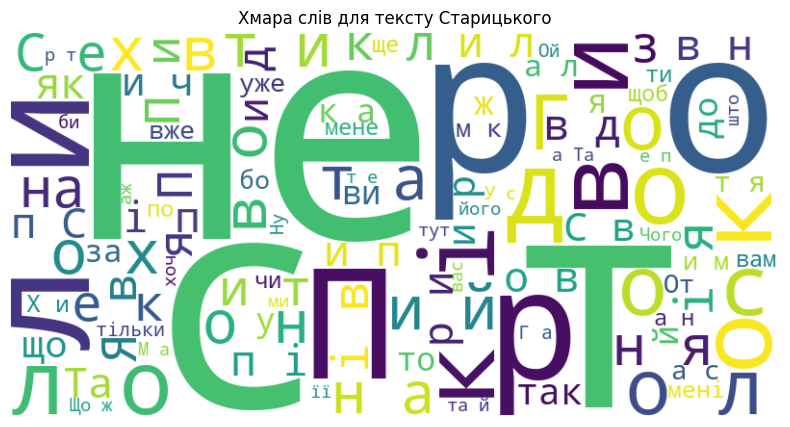

In [59]:
generate_wordcloud(staritskyi, "Хмара слів для тексту Старицького")

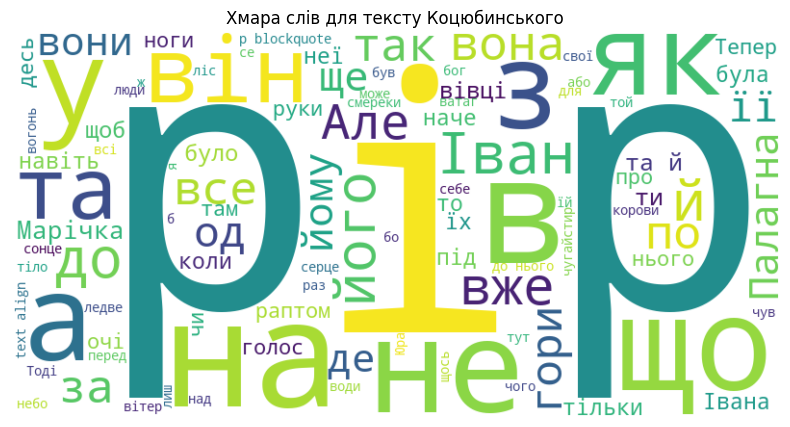

In [60]:
generate_wordcloud(kotsubynskyi, "Хмара слів для тексту Коцюбинського")

## Попередня обробка тексту Коцюбинського

## 1) Очистимо текст від тегів та розмітки

In [61]:
kotsubynskyi = clean_html(kotsubynskyi)

## 2) Видалимо стоп-слова

In [62]:
stopwords = pd.read_csv('cleaned_stopwords.csv', encoding='cp1251')['stopword'].tolist()

def remove_stopwords(text, stopwords):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    cleaned_text = ' '.join([word for word in text.split() if word not in stopwords])
    return cleaned_text

In [63]:
kotsubynskyi = remove_stopwords(kotsubynskyi, stopwords)

## 3) Видалимо числові дані з тексту

In [64]:
kotsubynskyi = remove_numbers(kotsubynskyi)

## 4) Токенізуємо та лемматизуємо наш текст

In [65]:
kotsubynskyi = tokenize_and_lemmatize(kotsubynskyi)

## Попередня обробка тексту Старицького

Для початку уважно переглянемо початок тексту:

     П р о к і п С в и р и д о в и ч Сірко — міщанин, має крамницю.
     Я в д о к і я П и л и п і в н а — його жінка.
     П р о н я — дочка їх.
     С е к л и т а Пилипівна Лимариха — сестра Сірчисі, перекупка.
     Г а л я — її дочка.

## 1) Бачимо, що написання дійових осіб здійснено через пробіли. Ми можемо видалити цих осіб, адже вони скоріш за все, не несуть емоційного забарвлення, або для повноти інформації можемо виправити ці помилки. 

In [66]:
staritskyi = staritskyi.lower()

replacements = {
    'п р о к і п': 'прокіп',
    'с в и р и д о в и ч': 'свиридович',
    'я в д о к і я': 'явдокія',
    'п и л и п і в н а': 'пилипівна',
    'п р о н я': 'проня',
    'с е к л и т а': 'секлита',
    'г а л я': 'галя',
    'г о л о х в о с т и й': 'голохвистий',
    'н а с т я': 'настя',
    'н а т а л к а': 'наталка',
    'x и м к а': 'химка',
    'п и д о р а': 'пидора',
    'с т е п а н': 'степан',
    'г л е й т ю к': 'глейтюк',
    'м а р т а': 'марта',
    'у с т я': 'устя',
    'д в а б а с и': 'два баси',
    'м е р о н і я': 'меронія',
    'й о с ь к а': 'йоська',
    'к в а р т а л ь н и й': 'квартальний',
    'к а т е р и н щ и к': 'катеринщик',
    'м і щ а н е': 'міщане',
    'л ю д': 'люд',
    '1-й б а с': '1-й бас',
    '2-й б а с': '2-й бас',
    'ж и д': 'жид',
    'с і р к о': 'сірко',
    'м і щ а н к и': 'міщанки',
    'м і щ а н є': 'міщанє',
    'г о с т і': 'гості',
    'д р у г і': 'другі',
    'п а р у б о к': 'парубок',
    'г о л о с': 'голос',
    'д і в ч и н а': 'дівчина',
    'у с і': 'усі',
    'в с і': 'всі',
    'д е х т о': 'дехто',
    'х л о п е ц ь': 'хлопець'
}

for old, new in replacements.items():
    staritskyi = staritskyi.replace(old, new)

## 2) По аналогії з попереднім текстом, очистимо текст від тегів та розмітки

In [67]:
staritskyi = clean_html(staritskyi)

## 3) Видалимо числові дані

In [68]:
staritskyi = remove_numbers(staritskyi)

## 4) Видалимо стоп-слова

In [69]:
staritskyi = remove_stopwords(staritskyi, stopwords)

## 5) Токенізуємо та лемматизуємо наш текст

In [70]:
staritskyi = tokenize_and_lemmatize(staritskyi)

## Побудуємо хмари слів для очищених даних

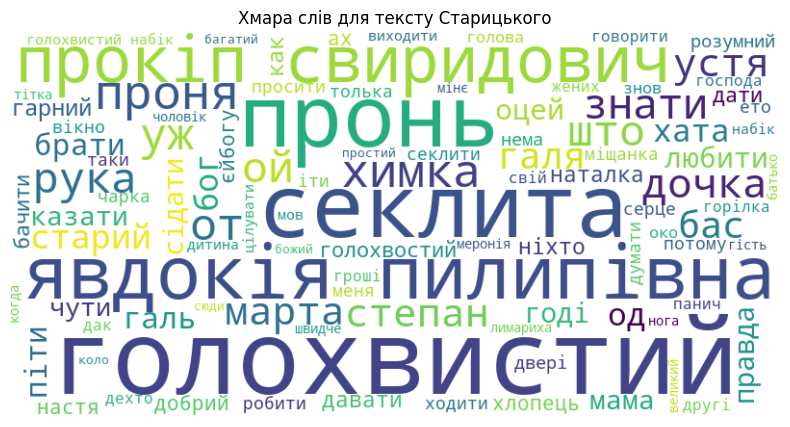

In [71]:
generate_wordcloud(' '.join(staritskyi), "Хмара слів для тексту Старицького")

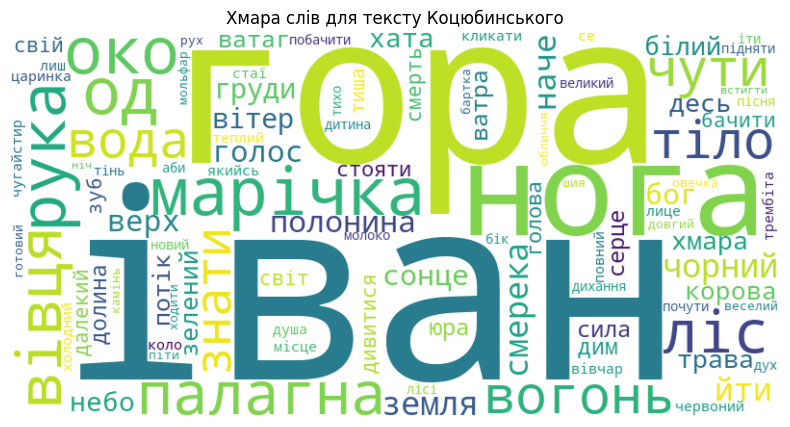

In [72]:
generate_wordcloud(' '.join(kotsubynskyi), "Хмара слів для тексту Коцюбинського")

## Який з письменників написав більш похмурі оповідання?

## За допомогою раніше розроблених функцій, підрахуємо сукупну тональність кожного тексту

In [73]:
total_staritskyi = analyze_sentiment(staritskyi)
print("Загальний сентимент для М. Старицького:", total_staritskyi)

Загальний сентимент для М. Старицького: -20


In [74]:
total_kotsubynskyi = analyze_sentiment(kotsubynskyi)
print("Загальний сентимент для М. Коцюбинського:", total_kotsubynskyi)

Загальний сентимент для М. Коцюбинського: -213


## Спираючись на загальні результати, можемо сказати, що М. Коцюбинський писав більш похмурі оповідання. Потрібно увести метрику, що враховуватиме розмірність текстів

Уведемо додаткову метрику:
$$
\text{Похмурість на слово} = \frac{\text{Сума сентименту}}{\text{Кількість слів у тексті}}
$$


In [75]:
cloudiness_kotsubynskyi = total_kotsubynskyi / len(' '.join(kotsubynskyi).split())
print("Похмурість на слово (М. Коцюбинський): ", cloudiness_kotsubynskyi)

Похмурість на слово (М. Коцюбинський):  -0.021694846200855572


In [76]:
cloudiness_staritskyi = total_staritskyi / len(' '.join(staritskyi).split())
print("Похмурість на слово (М. Старицький): ", cloudiness_staritskyi)

Похмурість на слово (М. Старицький):  -0.0019406171162429653


## Як бачимо, уведена метрика підтверджує гіпотезу про більш похмурий стиль оповідань М.Коцюбинського